In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bvh_converter import bvh_mod
from scipy.signal import savgol_filter

from matplotlib.lines import Line2D
from scipy.interpolate import interp1d

# from utils_trajectory.trajectory_by_subdiv import plot_foot_trajectories_by_subdiv
# from utils_trajectory.trajectory_by_beat import plot_foot_trajectories_by_beat
from utils_trajectory.trajectory_cycle import plot_all_cycles_trajectories
from utils_pipeline.pipeline_A import *


### Visualize trajectories with thresholding and average

count of included trajectories:  15
count of excluded trajectories:  36
[(166.55722222199998, 168.02211111066666), (168.02211111066666, 169.503), (169.503, 170.9785555553333), (170.9785555553333, 172.4505555553333), (172.4505555553333, 173.9083333333333), (173.9083333333333, 175.364333333), (175.364333333, 176.802555555), (176.802555555, 178.222111111), (198.59099999966668, 199.94477777766667), (328.99099999966666, 330.274555555), (330.274555555, 331.5225555553333), (331.5225555553333, 332.758111111), (332.758111111, 333.9989999996667), (333.9989999996667, 335.2452222223333), (335.2452222223333, 336.5394444445)]


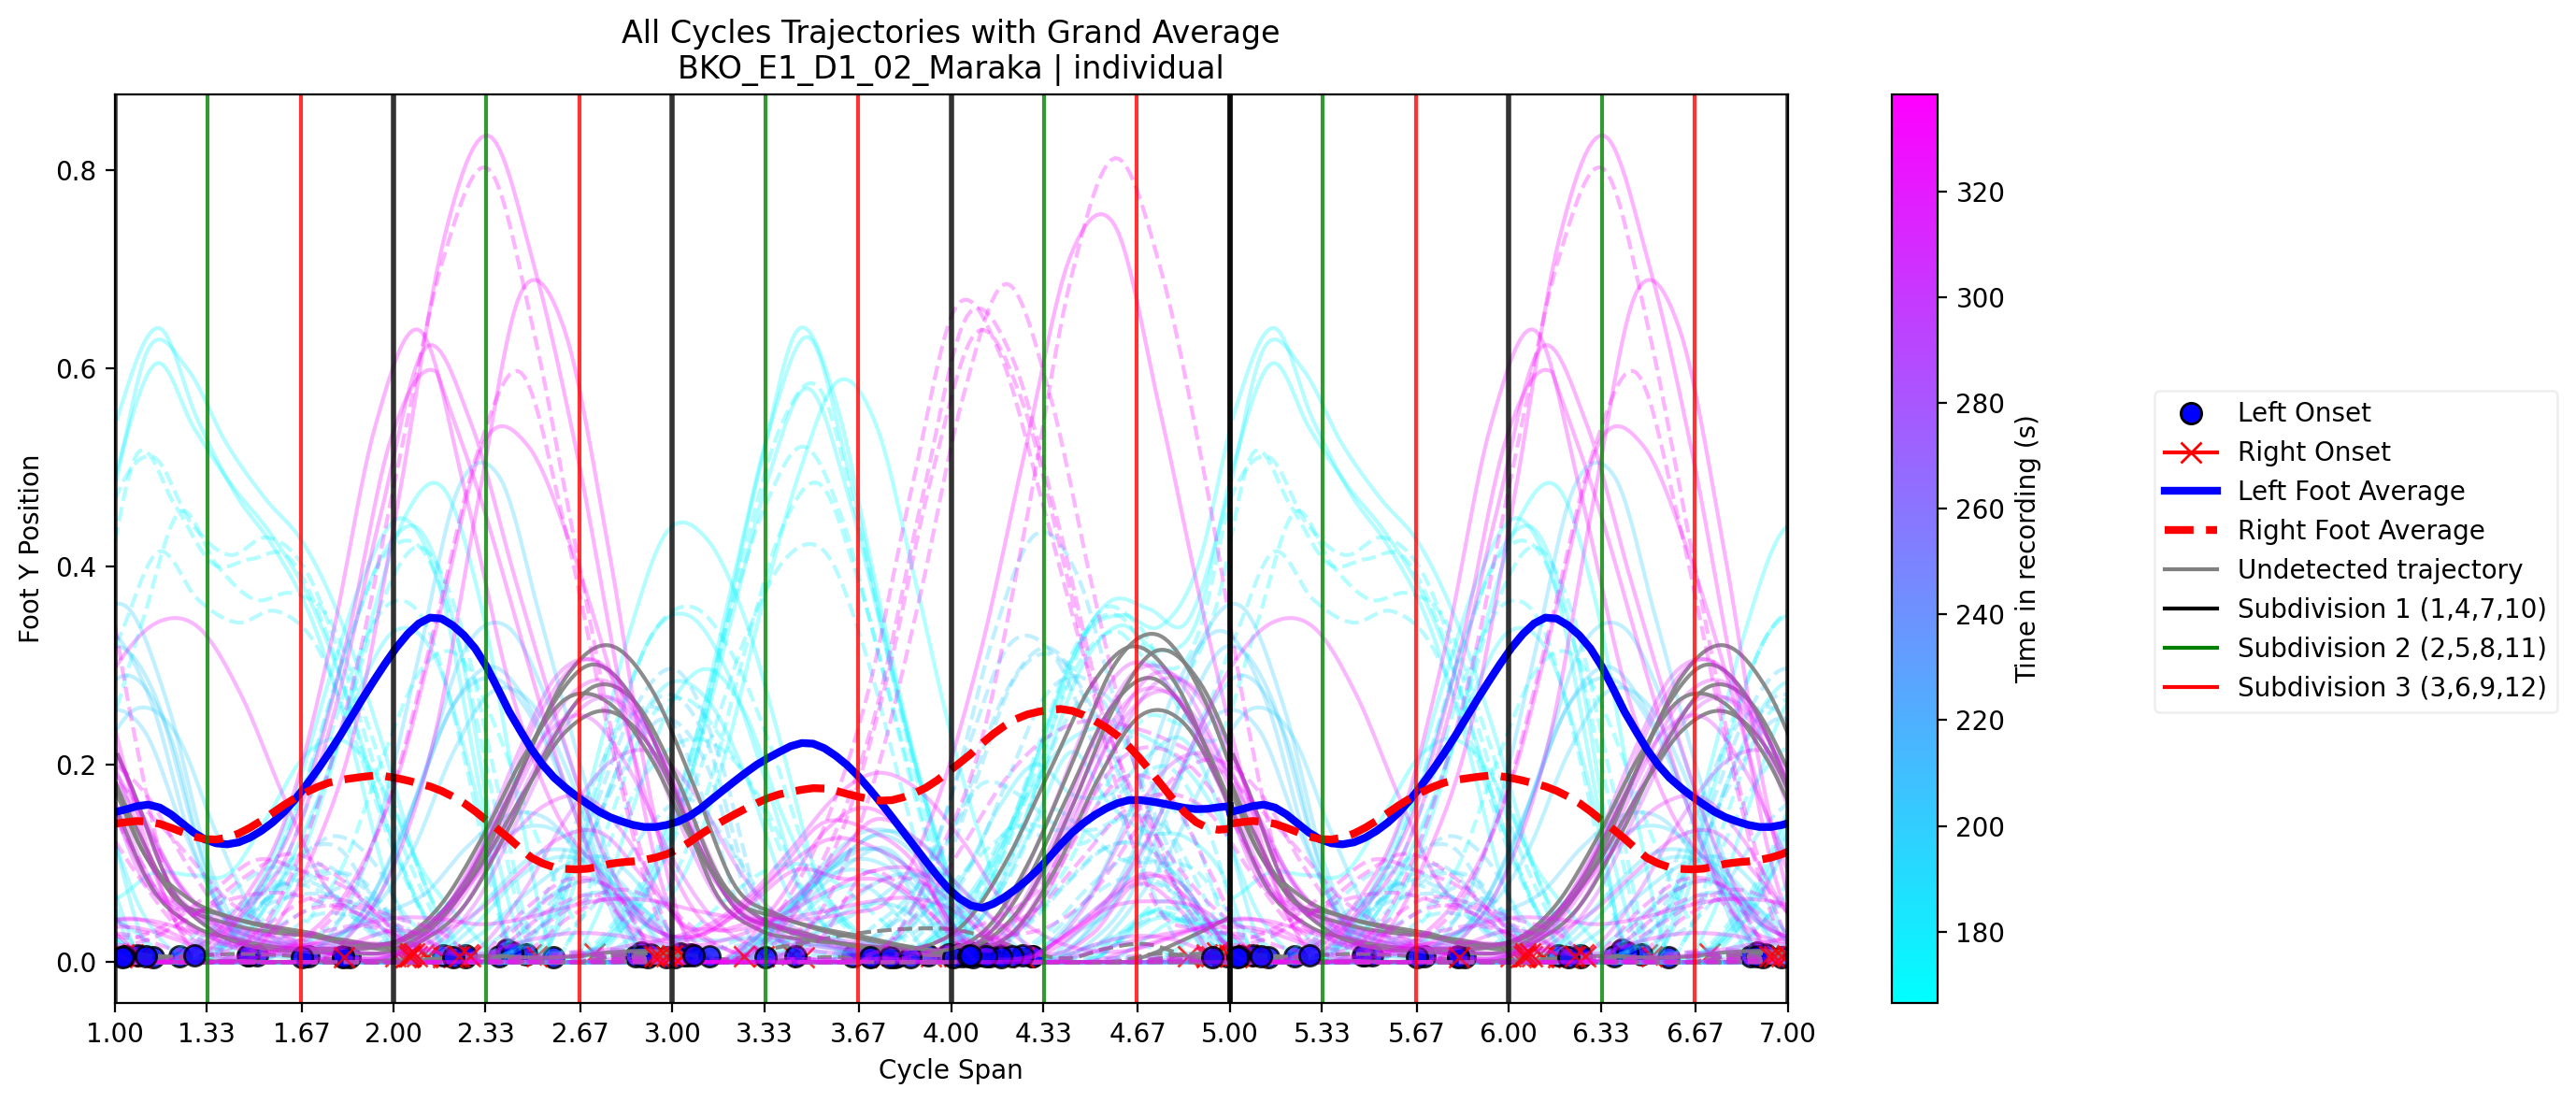

In [6]:
file_name = "BKO_E1_D1_02_Maraka"
mode_df = pd.read_csv("data/subset_dance_annotation/" + file_name + "_Dancers.csv")

mode_group = mode_df[mode_df["mocap"] == "gr"].reset_index(drop=True)
mode_individual = mode_df[mode_df["mocap"] == "in"].reset_index(drop=True)
mode_audience = mode_df[mode_df["mocap"] == "au"].reset_index(drop=True)

# dict of segments
segments = {
    "group":      get_segments(mode_group,      "gr"),
    "individual": get_segments(mode_individual, "in"),
    "audience":   get_segments(mode_audience,   "au")
}


# mode_name, segmnt = get_tsegment_for("group", mode_group,      "gr")
mode_name, segmnt = get_tsegment_for("individual", mode_individual, "in")
# mode_name, segmnt   = get_tsegment_for("audience",   mode_audience,   "au")


save_dir = f"output_static_plot/all_cycles_trajectories/{file_name}"
os.makedirs(save_dir, exist_ok=True)

fig, ax = plot_all_cycles_trajectories(
            file_name=file_name,
            mode=mode_name,
            base_path_cycles="data/virtual_cycles",
            base_path_logs="data/logs_v2_may",
            time_segments=segmnt,  # Pass all time segments for this mode
            n_beats_per_cycle=4, 
            n_subdiv_per_beat=3, 
            traj_threshold=0.4,     # exclude trajectories below this threshold
            show_gray_plots= True,
            show_trajectories= True,  # New parameter to control trajectory lines
            show_vlines= False        # New parameter to control vertical lines
        )

plt.show(fig)

# fig.savefig(os.path.join(save_dir, f"{file_name}_{mode}.png"))
# plt.close(fig)